# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  

**Nama:** Fathan Andi Kartagama

**NIM:** 122140055  

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


## Konfigurasi Awal

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

INPUT_IMAGE = "data/selfie.jpg"
OUT_DIR = "results_ws4"
NAMA_MAHASISWA = "Fathan Andi Kartagama"

os.makedirs(OUT_DIR, exist_ok=True)

## Load Gambar

In [2]:
img_bgr = cv2.imread(INPUT_IMAGE)
if img_bgr is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {INPUT_IMAGE}")

print(f"Ukuran gambar asli: {img_bgr.shape[1]}x{img_bgr.shape[0]} (W x H)")


Ukuran gambar asli: 1836x3264 (W x H)


## Cropping Manual - Wajah & Cropping Manual Background

In [3]:
# Cropping Manual – Wajah

print("[1] Pilih ROI Wajah (usahakan kotak di area wajah).")
print("    Cara: drag mouse → ENTER/SPACE untuk OK, atau C untuk batal.")
roi_face = cv2.selectROI("Pilih ROI Wajah", img_bgr, showCrosshair=True)
cv2.destroyWindow("Pilih ROI Wajah")

x_f, y_f, w_f, h_f = roi_face

# Biar benar-benar persegi, pakai sisi terkecil
side = min(w_f, h_f)
cx = x_f + w_f // 2
cy = y_f + h_f // 2

x0 = max(cx - side // 2, 0)
y0 = max(cy - side // 2, 0)
x1 = x0 + side
y1 = y0 + side

face_square = img_bgr[y0:y1, x0:x1]

# Cropping Manual – Background 

print("[2] Pilih ROI Background (latar belakang, bentuk persegi panjang).")
print("    Cara: drag mouse → ENTER/SPACE untuk OK, atau C untuk batal.")
roi_bg = cv2.selectROI("Pilih ROI Background", img_bgr, showCrosshair=True)
cv2.destroyWindow("Pilih ROI Background")

x_b, y_b, w_b, h_b = roi_bg
bg_rect = img_bgr[y_b:y_b + h_b, x_b:x_b + w_b]

[1] Pilih ROI Wajah (usahakan kotak di area wajah).
    Cara: drag mouse → ENTER/SPACE untuk OK, atau C untuk batal.
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/pataangg/Developer/Mulmed/.venv/lib/python3.12/site-packages/cv2/qt/plugins"
QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


[2] Pilih ROI Background (latar belakang, bentuk persegi panjang).
    Cara: drag mouse → ENTER/SPACE untuk OK, atau C untuk batal.
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!


## Resize 920x920

In [4]:
TARGET_SIZE = (920, 920)

face_resized = cv2.resize(face_square, TARGET_SIZE, interpolation=cv2.INTER_AREA)
bg_resized = cv2.resize(bg_rect, TARGET_SIZE, interpolation=cv2.INTER_AREA)

# Add Annotation (nama) di atas kepala

annotated = face_resized.copy()

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 2.0
thickness = 4
color = (0, 255, 255)  # kuning

(text_w, text_h), baseline = cv2.getTextSize(NAMA_MAHASISWA, font, font_scale, thickness)
x_text = (annotated.shape[1] - text_w) // 2
y_text = text_h + 40  # sedikit turun dari atas

cv2.putText(
    annotated,
    NAMA_MAHASISWA,
    (x_text, y_text),
    font,
    font_scale,
    color,
    thickness,
    lineType=cv2.LINE_AA
)


array([[[210, 227, 230],
        [208, 225, 228],
        [207, 224, 227],
        ...,
        [198, 211, 209],
        [194, 206, 206],
        [192, 204, 204]],

       [[210, 227, 230],
        [207, 224, 227],
        [206, 223, 226],
        ...,
        [200, 212, 210],
        [200, 211, 210],
        [195, 207, 206]],

       [[209, 226, 229],
        [208, 225, 228],
        [209, 226, 229],
        ...,
        [193, 204, 202],
        [193, 204, 202],
        [194, 205, 203]],

       ...,

       [[198, 221, 229],
        [197, 219, 227],
        [200, 221, 229],
        ...,
        [ 62, 120, 172],
        [ 58, 115, 169],
        [ 53, 111, 166]],

       [[197, 220, 228],
        [196, 218, 226],
        [201, 222, 230],
        ...,
        [ 62, 118, 171],
        [ 59, 116, 170],
        [ 56, 112, 167]],

       [[199, 222, 230],
        [200, 222, 230],
        [200, 221, 229],
        ...,
        [ 59, 113, 166],
        [ 63, 118, 172],
        [ 61, 117, 172]]

## Konversi dari BGR (OpenCV) ke Grayscale & HSV

In [5]:
# Konversi gambar ke format yang berbeda
gray = cv2.cvtColor(annotated, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(annotated, cv2.COLOR_BGR2HSV)

## Print Image dan Save ke Direktori

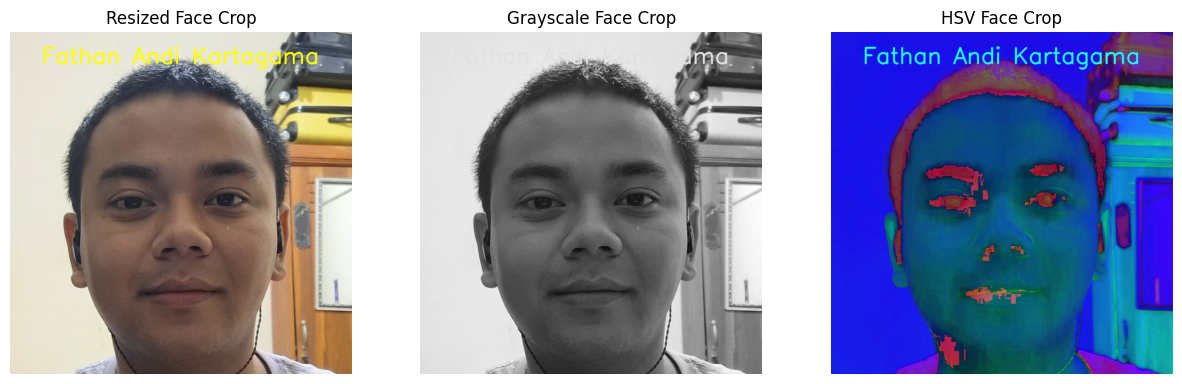

Semua hasil sudah disimpan di folder: results_ws4


In [6]:
# Plot all resized face images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Resized Face Crop")
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grayscale Face Crop")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("HSV Face Crop")
plt.imshow(hsv)
plt.axis('off')

plt.show()

# Simpan hasil
cv2.imwrite(os.path.join(OUT_DIR, "soal1_face_square_raw.png"), face_square)
cv2.imwrite(os.path.join(OUT_DIR, "soal1_face_resized_920x920.png"), face_resized)
cv2.imwrite(os.path.join(OUT_DIR, "soal1_bg_rect_resized_920x920.png"), bg_resized)

cv2.imwrite(os.path.join(OUT_DIR, "soal1_face_annotated_bgr.png"), annotated)
cv2.imwrite(os.path.join(OUT_DIR, "soal1_face_gray.png"), gray)
cv2.imwrite(os.path.join(OUT_DIR, "soal1_face_hsv.png"), hsv)

print("Semua hasil sudah disimpan di folder:", OUT_DIR)

## **PENJELASAN**

Pada proses ini, gambar selfie terlebih dahulu dipotong menjadi dua bagian menggunakan teknik cropping manual. Cropping persegi pada area wajah membuat gambar lebih fokus pada objek utama (saya) sehingga detail seperti mata, hidung, dan kontur wajah terlihat lebih jelas tanpa gangguan elemen latar belakang. Sebaliknya, cropping persegi panjang pada area background hanya menampilkan dinding saja

Setelah di-resize menjadi 920×920 piksel, gambar wajah diberi anotasi teks berisi nama di bagian atas. Gambar hasil crop kemudian dikonversi ke grayscale dan HSV. Konversi grayscale menghilangkan informasi warna sehingga hanya intensitas terang-gelap yang tersisa, membuat struktur bentuk tampak lebih dominan. Sementara itu, konversi HSV memisahkan komponen Hue, Saturation, dan Value sehingga distribusi warnanya terlihat berbeda dibandingkan warna asli, namun tetap mempertahankan karakter visual dari gambar

Secara keseluruhan, proses cropping membantu memusatkan perhatian pada area penting (kasus ini adalah wajah saya), sementara perubahan warna memperlihatkan bagaimana informasi visual dapat ditransformasikan menjadi representasi yang lebih sederhana atau lebih terstruktur sesuai kebutuhan analisis citra

---

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


## Konfigurasi dan Load Gambar

In [7]:
# Konfigurasi untuk Soal 2

IN_DIR = "results_ws4"
OUT_DIR = "results_ws4"
os.makedirs(OUT_DIR, exist_ok=True)

# Pakai gambar hasil crop dari Soal 1
INPUT_CROP = os.path.join(IN_DIR, "soal1_face_resized_920x920.png")
OUTPUT_MODIFIED = os.path.join(OUT_DIR, "soal2_rgb_modified.png")

# Load gambar dam Konversi ke RGB
img_bgr = cv2.imread(INPUT_CROP)
if img_bgr is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {INPUT_CROP}")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

## Split Channel R, G, B dan Manipulasi Channel

In [8]:
# Split channel R, G, B
r, g, b = cv2.split(img_rgb)

# Konversi ke tipe lebih besar dulu biar aman dari overflow/underflow
r_16 = r.astype(np.int16)
g_16 = g.astype(np.int16)
b_16 = b.astype(np.int16)

# Manipulasi channel
r_mod = np.clip(r_16 + 50, 0, 255).astype(np.uint8)
b_mod = np.clip(b_16 - 30, 0, 255).astype(np.uint8)
g_mod = g  # tidak diubah

## Gabungkan menjadi gambar RGB kembali & Print Image

Gambar hasil modifikasi disimpan di: results_ws4/soal2_rgb_modified.png


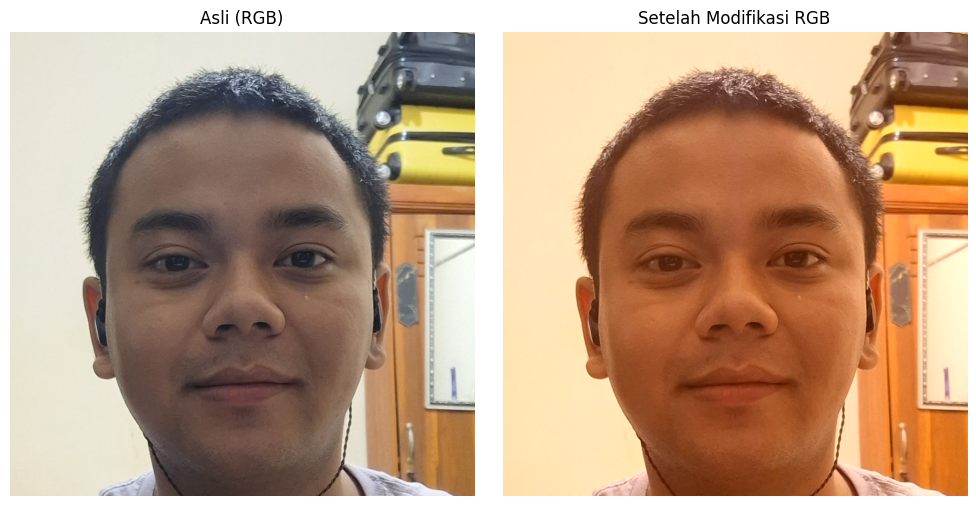

In [9]:
img_rgb_mod = cv2.merge((r_mod, g_mod, b_mod))

# Simpan sebagai PNG (konversi dulu ke BGR untuk cv2.imwrite)
img_bgr_mod = cv2.cvtColor(img_rgb_mod, cv2.COLOR_RGB2BGR)
cv2.imwrite(OUTPUT_MODIFIED, img_bgr_mod)
print("Gambar hasil modifikasi disimpan di:", OUTPUT_MODIFIED)

# Tampilkan gambar asli dan hasil modifikasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Asli (RGB)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_rgb_mod)
plt.title("Setelah Modifikasi RGB")
plt.axis("off")

plt.tight_layout()
plt.show()

## Histogram Perchannel Asli dan Modified

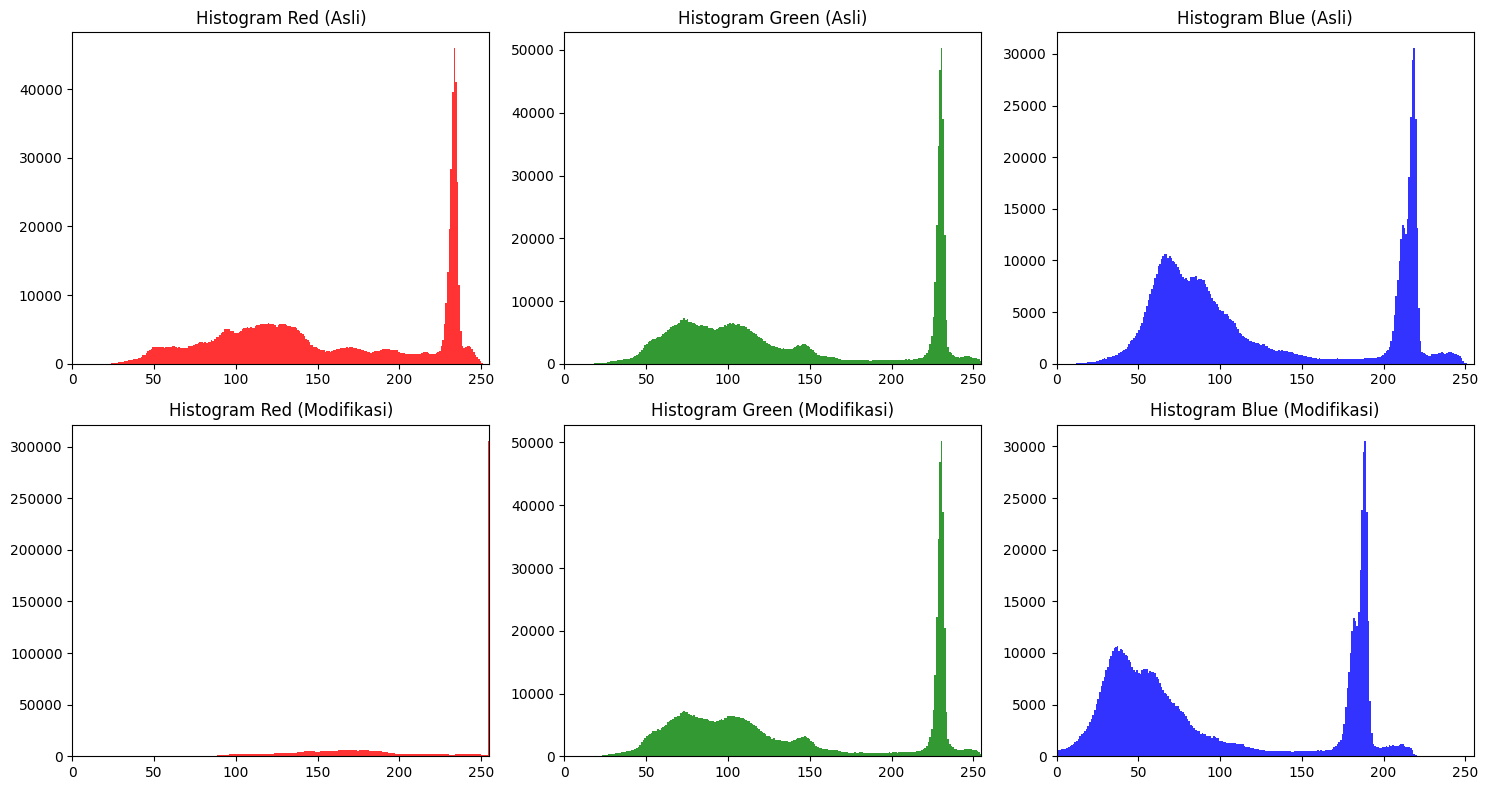

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

channels_orig = [r, g, b]
channels_mod = [r_mod, g_mod, b_mod]
colors = ['red', 'green', 'blue']
names = ['Red', 'Green', 'Blue']

# Histogram gambar asli
for i, (ch, c, name) in enumerate(zip(channels_orig, colors, names)):
    axes[0, i].hist(ch.flatten(), bins=256, range=(0, 255), color=c, alpha=0.8)
    axes[0, i].set_title(f"Histogram {name} (Asli)")
    axes[0, i].set_xlim([0, 255])

# Histogram gambar modifikasi
for i, (ch, c, name) in enumerate(zip(channels_mod, colors, names)):
    axes[1, i].hist(ch.flatten(), bins=256, range=(0, 255), color=c, alpha=0.8)
    axes[1, i].set_title(f"Histogram {name} (Modifikasi)")
    axes[1, i].set_xlim([0, 255])

plt.tight_layout()
plt.show()

## **PENJELASAN**

Setelah menaikkan intensitas channel merah sebesar 50 poin dan menurunkan channel biru sebesar 30 poin, tampilan gambar berubah menjadi lebih hangat. Warna kulit dan latar belakang terlihat lebih kekuningan karena komponen merah menjadi lebih dominan, sementara nuansa kebiruan pada bayangan dan detail wajah berkurang. Pergeseran warna ini selaras dengan histogram: pada channel merah, distribusi piksel bergeser kuat ke arah nilai tinggi sehingga puncaknya menumpuk pada intensitas 255 akibat clipping. Sebaliknya, channel biru menunjukkan pergeseran ke intensitas lebih rendah, tampak dari penurunan nilai pada bagian tinggi histogram. Channel hijau tetap stabil karena tidak dimodifikasi

---

### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


## Load Gambar

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Path langsung ke file (karena sudah di folder Worksheet-4)
IMG_PATH = os.path.join("data", "koin.jpg")

if not os.path.exists(IMG_PATH):
    raise FileNotFoundError(f"Gambar tidak ditemukan: {IMG_PATH}")

img = cv2.imread(IMG_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


## Edge Detection, Thresholding (Segmentasi), dan Bounding Box Otomatis

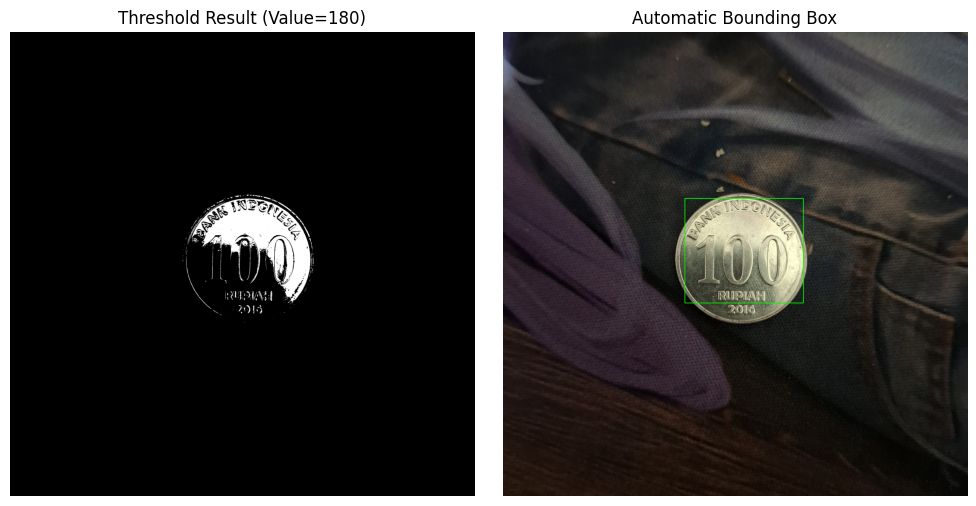

In [5]:
# Gaussian Blur untuk mengurangi noise
blur = cv2.GaussianBlur(img_rgb, (5, 5), 0)

# Konversi ke grayscale
gray_blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)

# Thresholding 
threshold_value = 180
_, thresh_img = cv2.threshold(gray_blur, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours_thresh, _ = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_with_bbox = img_rgb.copy() 

if contours_thresh:
    # Find the largest contour (assuming it's your main object)
    largest_contour = max(contours_thresh, key=cv2.contourArea)
    
    # Get the bounding box coordinates for that contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Draw the automatically found rectangle
    cv2.rectangle(
        img_with_bbox, 
        (x, y),                  # Top-left corner (automatic)
        (x + w, y + h),          # Bottom-right corner (automatic)
        (0, 255, 0),             # Color (Green)
        3                        # Thickness
    )
else:
    print("No contours were found.")

# Plot Threshold and Bounding Box results
fig_bbox, axs_bbox = plt.subplots(1, 2, figsize=(10, 5))

axs_bbox[0].imshow(thresh_img, cmap='gray')
axs_bbox[0].set_title(f"Threshold Result (Value={threshold_value})", fontsize=12)
axs_bbox[0].axis("off")

axs_bbox[1].imshow(img_with_bbox)
axs_bbox[1].set_title("Automatic Bounding Box", fontsize=12)
axs_bbox[1].axis("off")

plt.tight_layout()
plt.show()

## Filter Blur dan Sharpening

In [6]:
# Filter Blur
blurred = cv2.GaussianBlur(img_rgb, (25, 25), 0)

#Filter Sharpening
kernel_sharp = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
sharpened = cv2.filter2D(img_rgb, -1, kernel_sharp)

## Plot Semua Gambar

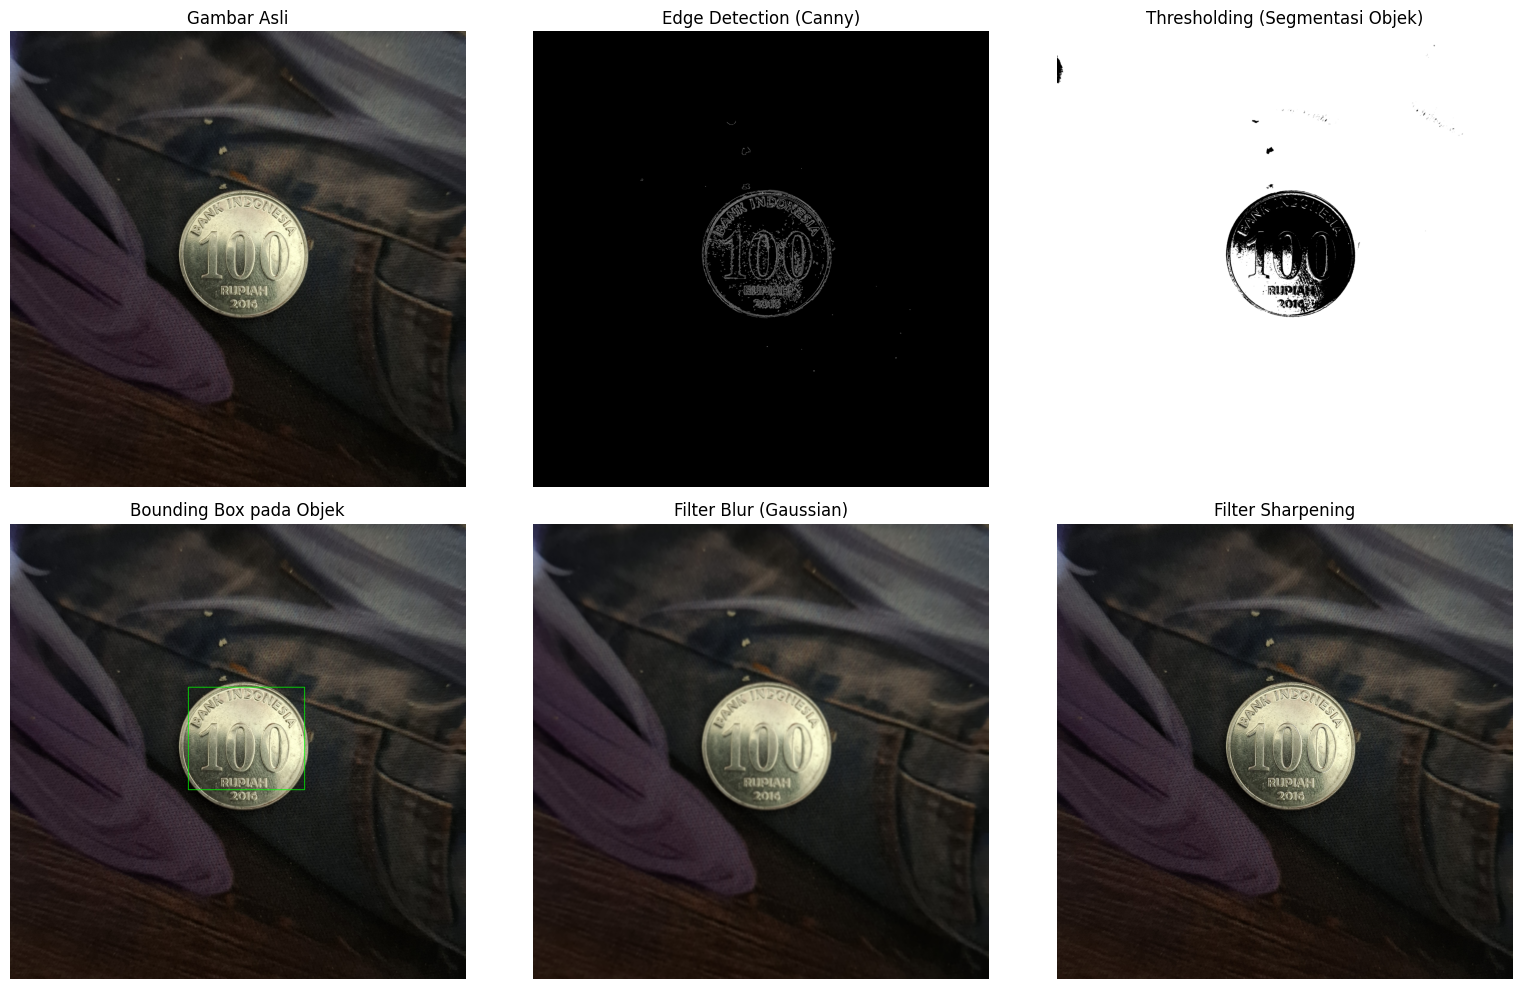

In [8]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding (Segmentasi Objek)")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(img_with_bbox)
plt.title("Bounding Box pada Objek")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(blurred)
plt.title("Filter Blur (Gaussian)")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(sharpened)
plt.title("Filter Sharpening")
plt.axis("off")

plt.tight_layout()
plt.show()

In [9]:
# Pastikan folder results_ws4 ada
OUT_DIR_S3 = "results_ws4"
os.makedirs(OUT_DIR_S3, exist_ok=True)

# Simpan gambar asli (konversi ke BGR untuk cv2.imwrite)
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_original.png"), cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

# Simpan edge detection (Canny) - langsung dari gray, perlu dibuat dulu
edges = cv2.Canny(gray, 100, 200)
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_canny_edges.png"), edges)

# Simpan threshold (sudah ada sebagai thresh_img)
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_threshold.png"), thresh_img)

# Simpan bounding box
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_bounding_box.png"), cv2.cvtColor(img_with_bbox, cv2.COLOR_RGB2BGR))

# Simpan blur
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_blur.png"), cv2.cvtColor(blurred, cv2.COLOR_RGB2BGR))

# Simpan sharpening
cv2.imwrite(os.path.join(OUT_DIR_S3, "soal3_sharpening.png"), cv2.cvtColor(sharpened, cv2.COLOR_RGB2BGR))

print(f"Semua hasil Soal 3 sudah disimpan di folder: {OUT_DIR_S3}")
print("File yang disimpan:")
print("  - soal3_original.png")
print("  - soal3_canny_edges.png")
print("  - soal3_threshold.png")
print("  - soal3_bounding_box.png")
print("  - soal3_blur.png")
print("  - soal3_sharpening.png")

Semua hasil Soal 3 sudah disimpan di folder: results_ws4
File yang disimpan:
  - soal3_original.png
  - soal3_canny_edges.png
  - soal3_threshold.png
  - soal3_bounding_box.png
  - soal3_blur.png
  - soal3_sharpening.png


## **PENJELASAN**

**Canny Edge Detection:**
Canny berfungsi sebagai detector tepi. Pada hasilnya terlihat bahwa semua detail halus di permukaan dihilangkan, dan hanya garis-garis dengan perubahan intensitas tajam yang dipertahankan. Karena itu, gambar menjadi hitam dengan garis putih yang menggambarkan kontur koin dan beberapa tepi acak dari background

**Thresholding:**
Thresholding bekerja sebagai metode segmentasi yang membagi piksel menjadi dua kelas berdasarkan nilai ambang (180). Piksel yang lebih terang dari ambang dijadikan putih, sedangkan yang lebih gelap menjadi hitam. Akibatnya, semua gradasi dan bayangan menghilang, dan gambar berubah menjadi bentuk hitam-putih sederhana yang mudah dikenali sebagai objek

**Blur Filter (25×25):**
Gaussian blur bertindak sebagai penghalus yang mengurangi ketajaman dan meratakan detail. Dengan kernel besar 25×25, efek kaburnya sangat kuat—ukiran pada koin maupun tekstur kain hampir hilang karena proses perataan nilai piksel dengan tetangga sekitarnya

**Sharpening Filter:**
Sharpening adalah kebalikan dari blur. Filter ini meningkatkan detail dengan memperkuat kontras lokal antar piksel. Hasilnya, tepi koin tampak lebih tegas dan pola serat kain terlihat lebih jelas dibandingkan gambar asli

---

### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

## Load Gambar Selfie dan Filter Thug

In [12]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

# Konfigurasi path
DATA_DIR = os.path.join("data")
OUT_DIR = "results_ws4"
os.makedirs(OUT_DIR, exist_ok=True)

SELFIE_PATH = os.path.join(DATA_DIR, "selfie.jpg")
FILTER_PATH = os.path.join(DATA_DIR, "thug.png")  # PNG dengan alpha

# Load gambar selfie & filter

img_bgr = cv2.imread(SELFIE_PATH)
if img_bgr is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {SELFIE_PATH}")

h, w = img_bgr.shape[:2]
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Filter PNG (harus 4 channel: BGRA)
filter_png = cv2.imread(FILTER_PATH, cv2.IMREAD_UNCHANGED)
if filter_png is None or filter_png.shape[2] != 4:
    raise ValueError("thug.png harus berupa PNG dengan alpha channel (4 channel).")


## Deteksi landmark Wajah dengan Menggunakan Mediapipe Facemesh

In [13]:
mp_face_mesh = mp.solutions.face_mesh

with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5
) as face_mesh:
    results = face_mesh.process(img_rgb)

if not results.multi_face_landmarks:
    raise RuntimeError("Tidak ada wajah terdeteksi pada selfie.jpg")

face_landmarks = results.multi_face_landmarks[0]

# Konversi landmark ke koordinat piksel
landmarks = []
for lm in face_landmarks.landmark:
    x_px = int(lm.x * w)
    y_px = int(lm.y * h)
    landmarks.append((x_px, y_px))

I0000 00:00:1763312484.884762   51260 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1763312484.918577   54827 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 25.2.7-arch1.1), renderer: Mesa Intel(R) UHD Graphics (TGL GT2)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1763312484.924035   54818 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1763312484.968560   54817 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/home/pataangg/Developer/Mulmed/.venv/lib/python3.12/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype

In [34]:
left_eye = landmarks[33]   # sudut luar mata kiri
right_eye = landmarks[263] # sudut luar mata kanan

cx = int((left_eye[0] + right_eye[0]) / 2)
cy = int((left_eye[1] + right_eye[1]) / 2)

eye_distance = np.linalg.norm(np.array(left_eye) - np.array(right_eye))

SCALE_W = 2.3  # diperbesar dari 2.2 agar lebih lebar
overlay_width = int(SCALE_W * eye_distance)

fh, fw = filter_png.shape[:2]
aspect_ratio = fh / fw
overlay_height = int(overlay_width * aspect_ratio)

# Pusatkan di garis mata dengan offset vertikal dan horizontal
x1 = int(cx - overlay_width / 2)
y1 = int(cy - overlay_height / 2)

# Offset horizontal untuk menggeser ke kiri (negatif = kiri, positif = kanan)
HORIZ_OFFSET = -0.05  # sesuaikan nilai ini (coba -0.03 hingga -0.1)
x1 = x1 + int(HORIZ_OFFSET * overlay_width)

# Offset vertikal untuk menurunkan posisi kacamata
VERT_OFFSET = 0.15  # positif = turun, bisa disesuaikan (coba 0.1 - 0.3)
y1 = y1 + int(VERT_OFFSET * overlay_height)

x2 = x1 + overlay_width
y2 = y1 + overlay_height


In [35]:
# Clipping jika keluar frame

x1_clip = max(0, x1)
y1_clip = max(0, y1)
x2_clip = min(w, x2)
y2_clip = min(h, y2)

# Update ukuran overlay sesuai area yang tersisa
overlay_width_clip = x2_clip - x1_clip
overlay_height_clip = y2_clip - y1_clip

if overlay_width_clip <= 0 or overlay_height_clip <= 0:
    raise RuntimeError("Overlay di luar area gambar, sesuaikan skala / posisi.")

# Resize filter ke ukuran yang sudah di-clip
filter_resized = cv2.resize(filter_png, (overlay_width_clip, overlay_height_clip), interpolation=cv2.INTER_AREA)

# Pisahkan BGR dan alpha
filter_bgr = filter_resized[:, :, :3]
filter_alpha = filter_resized[:, :, 3] / 255.0  # ke [0,1]

# Alpha blending
output = img_rgb.copy()

roi = output[y1_clip:y2_clip, x1_clip:x2_clip]

# pastikan shape sama
if roi.shape[:2] != filter_bgr.shape[:2]:
    raise RuntimeError("Ukuran ROI dan filter tidak cocok setelah resize.")

alpha = filter_alpha[..., np.newaxis]  # (H, W, 1)

roi_blended = (alpha * filter_bgr + (1 - alpha) * roi).astype(np.uint8)

output[y1_clip:y2_clip, x1_clip:x2_clip] = roi_blended



## Print Image

Hasil filter disimpan di: results_ws4/soal4_selfie_thug_filter.png


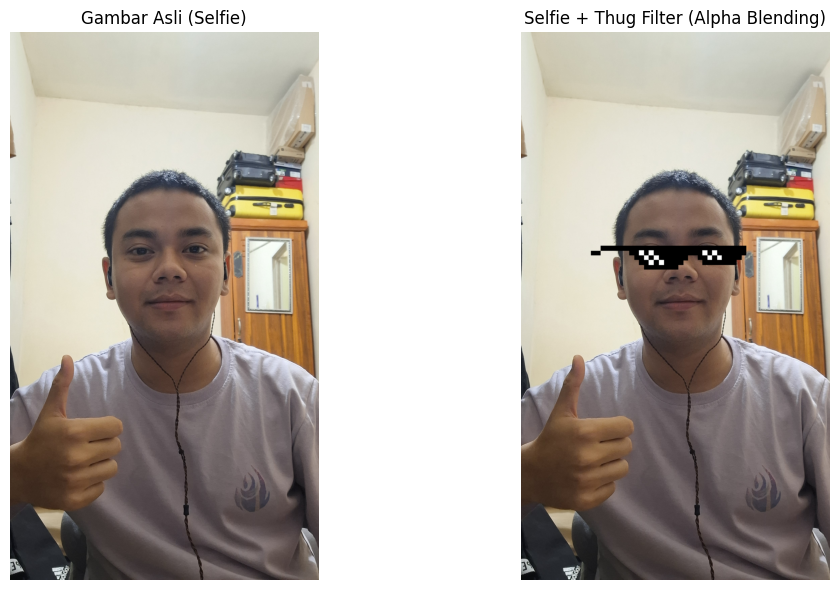

In [36]:
out_bgr = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
out_path = os.path.join(OUT_DIR, "soal4_selfie_thug_filter.png")
cv2.imwrite(out_path, out_bgr)
print("Hasil filter disimpan di:", out_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli (Selfie)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("Selfie + Thug Filter (Alpha Blending)")
plt.axis("off")

plt.tight_layout()
plt.show()


## **PENJELASAN**

Menggunakan MediaPipe FaceMesh untuk mendeteksi wajah dan landmark. Dari ratusan titik yang dihasilkan, saya memilih dua landmark utama di sekitar mata, yaitu titik 33 (sudut luar mata kiri) dan titik 263 (sudut luar mata kanan). Koordinat landmark ini terlebih dahulu dikonversi dari koordinat normalisasi MediaPipe (0–1) menjadi koordinat piksel berdasarkan lebar dan tinggi citra

Posisi overlay kacamata dihitung dengan mencari titik tengah di antara kedua mata sebagai pusat filter. Lebar kacamata ditentukan proporsional terhadap jarak antar mata (sekitar 2.3 × jarak kedua landmark), sedangkan tinggi disesuaikan dengan rasio aspek gambar PNG `thug.png`. Dari lebar dan tinggi ini saya menghitung titik kiri-atas dan kanan-bawah overlay, kemudian melakukan clipping jika ada bagian yang keluar dari batas gambar. Overlay PNG yang memiliki alpha channel di-resize ke ukuran tersebut, lalu digabungkan dengan citra selfie menggunakan alpha blending: setiap piksel pada area ROI merupakan kombinasi antara piksel filter dan piksel asli dengan bobot dari nilai alpha

Tantangan utama yang saya hadapi adalah menyesuaikan skala dan posisi filter agar pas di area mata, terutama ketika wajah tidak benar-benar tegak lurus atau sedikit miring. Selain itu, perlu perhatian pada konversi koordinat (dari normalisasi ke piksel) serta penanganan kasus ketika bounding overlay keluar dari batas citra sehingga perlu dilakukan clipping agar program tidak error dan hasil blendingnya tetap rapi

---

### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

IMG_PATH = os.path.join( "data","kertas.jpg")

img = cv2.imread(IMG_PATH)
if img is None:
    raise FileNotFoundError(f"Gambar tidak ditemukan: {IMG_PATH}")

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Pilih Titik secara manual

In [6]:
print("Pilih 4 titik sudut kertas: urutkan searah jarum jam atau counter-clockwise.")
print("Klik 4 sudut → tekan ENTER.")

points = []

def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append((x, y))
        cv2.circle(tmp, (x, y), 6, (0, 0, 255), -1)
        cv2.imshow("Pilih 4 Titik", tmp)

tmp = img_rgb.copy()
cv2.imshow("Pilih 4 Titik", tmp)
cv2.setMouseCallback("Pilih 4 Titik", click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()


pts_src = np.array(points, dtype=np.float32)

Pilih 4 titik sudut kertas: urutkan searah jarum jam atau counter-clockwise.
Klik 4 sudut → tekan ENTER.


##  Tentukan ukuran output hasil koreksi perspektif

In [ ]:
# Estimasi: lebar = jarak antara titik atas, tinggi = jarak antara titik kiri
width = int(np.linalg.norm(pts_src[0] - pts_src[1]))
height = int(np.linalg.norm(pts_src[0] - pts_src[3]))

pts_dst = np.array([
    [0, 0],
    [width, 0],
    [width, height],
    [0, height]
], dtype=np.float32)


In [ ]:
# Hitung homografi & warp perspective

H, _ = cv2.findHomography(pts_src, pts_dst)
warped = cv2.warpPerspective(img_rgb, H, (width, height))

# grayscale setelah warp
warped_gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

thresh = cv2.adaptiveThreshold(
    warped_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    25, 10
)



## Plot Gambar

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(warped)
plt.title("Setelah Koreksi Perspektif")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(thresh, cmap="gray")
plt.title("Thresholding Adaptif")
plt.axis("off")

plt.tight_layout()
plt.show()

# **LAMPIRAN**

[Github](https://github.com/pataanggs/Mulmed)
[ChatGPT]()